In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train = pd.read_csv("../data/Video_games_esrb_rating.csv",index_col="title")
test = pd.read_csv("../data/test_esrb.csv",index_col="title")
train

,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
title,,,,,,,,,,,,,,,,,,,,,
Monster Jam Steel Titans 2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
Subnautica: Below Zero,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,ET
NIER REPLICANT VER.1.22474487139…,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,M
Jamestown+,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,ET
Neptunia Virtual Stars,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SENRAN KAGURA Peach Beach Splash,0,0,0,0,0,0,0,0,1,0,...,1,1,0,1,0,0,0,0,0,M
Sneaky Bears,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,T
SPARC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E


([<matplotlib.patches.Wedge at 0x1e065287188>,
 [Text(-0.08471423906438455, 1.0967331023087352, 'PlayStation'),
  Text(0.08471434174794724, -1.096733094377211, 'Available on Both')],
 [Text(-0.046207766762391564, 0.5982180558047646, '52.45%'),
  Text(0.04620782277160758, -0.5982180514784786, '47.55%')])

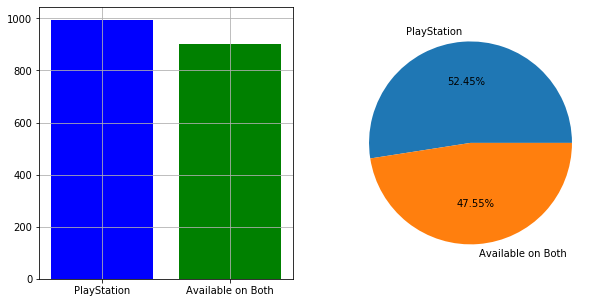

In [26]:
psExclusive = len(train[train["console"] == 0])
availableOnBoth = len(train[train["console"] == 1])
sumList = [psExclusive,availableOnBoth]
nameList =["PlayStation","Available on Both"]

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)
ax.grid(True)
ax.bar(nameList,sumList,color=["blue","green"])
ax1.pie(sumList,labels=nameList,autopct='%1.2f%%',)


In [104]:
trainCols = train.columns.drop("esrb_rating")
x_train = train[trainCols].values

y_train = train["esrb_rating"].values.reshape(-1,1)
y_train

array([['E'],
       ['ET'],
       ['M'],
       ...,
       ['E'],
       ['T'],
       ['E']], dtype=object)

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier() # default gini

model.fit(x_train, y_train)

y_pre = model.predict(x_train)
acc_val = accuracy_score(y_train, y_pre)

print("{:.0f}".format(acc_val*100))

92


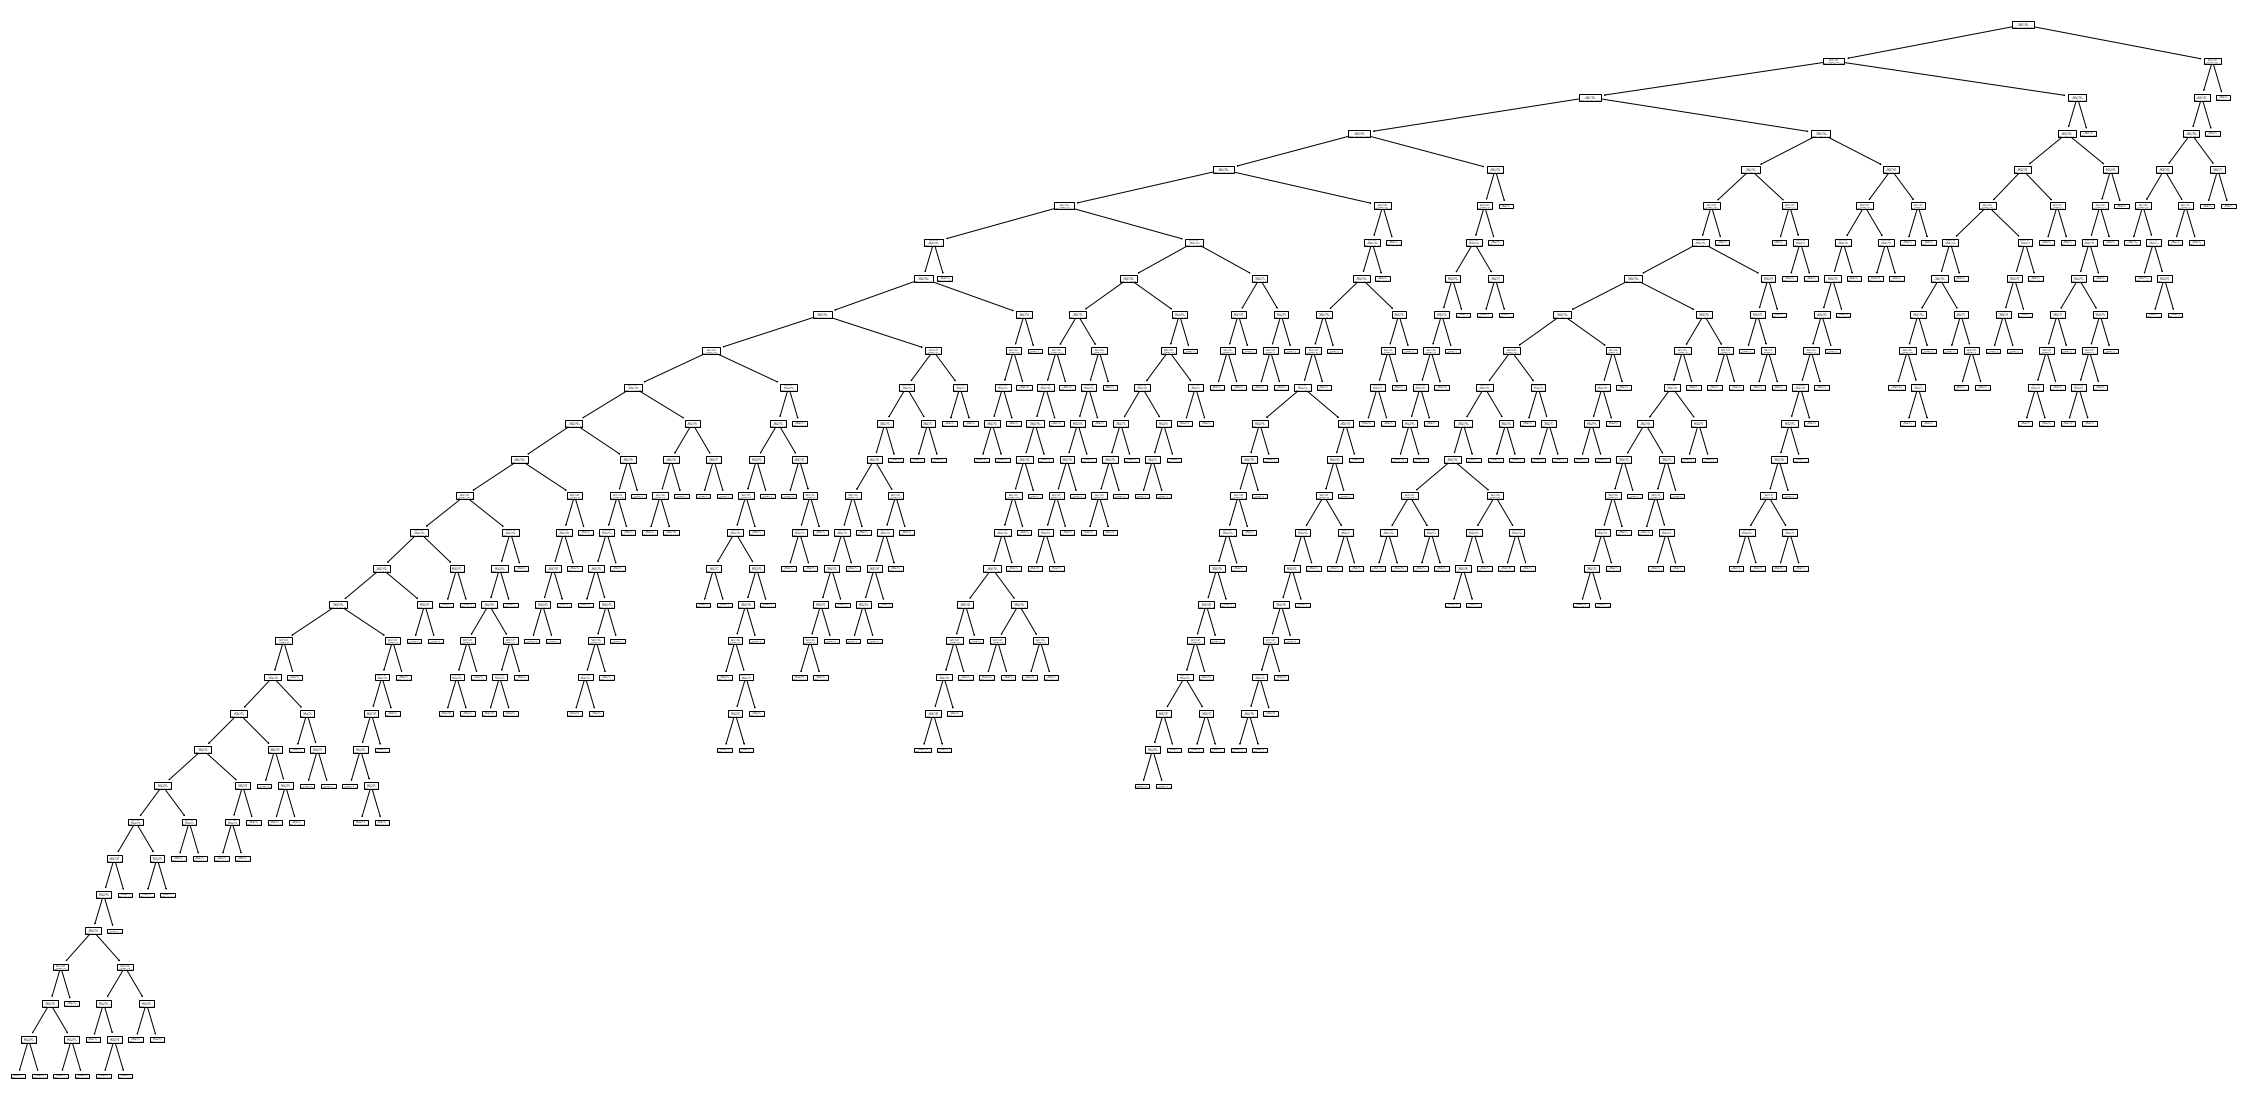

In [10]:
from sklearn import tree

fig = plt.figure(figsize=(40, 20))
ax = fig.add_subplot(1,1,1)

tree.plot_tree(model, ax=ax)

plt.show()

In [11]:
model_ent = DecisionTreeClassifier(random_state=0, criterion="entropy")

model_ent.fit(x_train, y_train)

y_pre = model_ent.predict(x_train)
acc_val = accuracy_score(y_train, y_pre)
print("{:.0f}".format(acc_val*100))

92


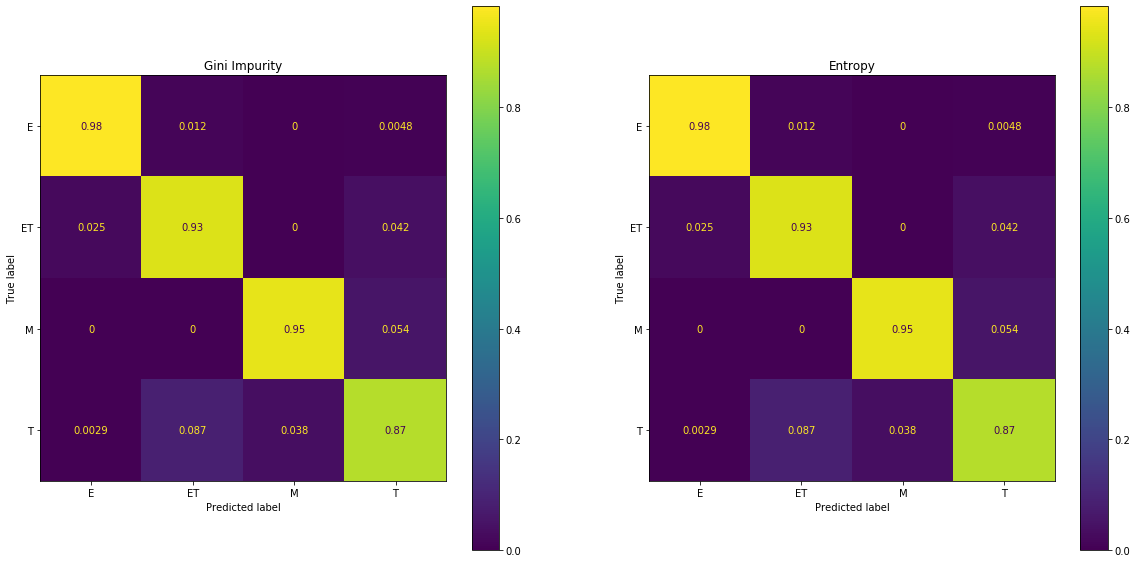

In [12]:
from sklearn.metrics import plot_confusion_matrix

fig = plt.figure(figsize=(20, 10))

ax = fig.add_subplot(1,2,1)

ax.set_title("Gini Impurity")

plot_confusion_matrix(model, x_train, y_train, ax=ax, normalize="true")

ax = fig.add_subplot(1,2,2)

ax.set_title("Entropy")

plot_confusion_matrix(model_ent, x_train, y_train, ax=ax, normalize="true")

In [13]:
model.get_depth()

29

In [14]:
model_ent.get_depth()

29

([<matplotlib.patches.Wedge at 0x1e064c91a88>,
 [Text(-0.02073322272803588, 1.099804588768073, 'PlayStation'),
  Text(0.02073311975689866, -1.0998045907092524, 'Available on Both')],
 [Text(-0.011309030578928661, 0.5998934120553124, '50.60%'),
  Text(0.011308974412853813, -0.5998934131141377, '49.40%')])

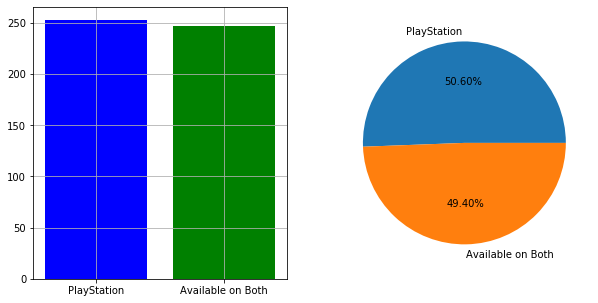

In [15]:
psExclusive = len(test[test["console"] == 0])
availableOnBoth = len(test[test["console"] == 1])
sumList_test = [psExclusive,availableOnBoth]
nameList_test =["PlayStation","Available on Both"]

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)
ax.grid(True)
ax.bar(nameList_test,sumList_test,color=["blue","green"])
ax1.pie(sumList_test,labels=nameList_test,autopct='%1.2f%%',)

In [113]:
testCols = test.columns.drop("esrb_rating","console")
x_test = test[trainCols].values

y_test = test["esrb_rating"].values.reshape(-1,1)
y_test[0:10]

array([['T'],
       ['E'],
       ['T'],
       ['E'],
       ['ET'],
       ['M'],
       ['M'],
       ['ET'],
       ['E'],
       ['T']], dtype=object)

In [35]:
y_test_pre = model.predict(x_test)
acc_val_test = accuracy_score(y_test,y_test_pre)
print("{:.0f}".format(acc_val_test*100))

84


In [39]:
first_feature_imp = model.feature_importances_
first_feature_imp

array([0.01806645, 0.01661516, 0.01096708, 0.06133026, 0.06313938,
       0.0070321 , 0.0152467 , 0.01189236, 0.08576817, 0.01878076,
       0.03613535, 0.01338695, 0.00490379, 0.01903904, 0.01197528,
       0.06664243, 0.01029944, 0.01446253, 0.01780227, 0.01653797,
       0.15905242, 0.00260647, 0.00499431, 0.00647041, 0.01957999,
       0.01859522, 0.17067946, 0.02156486, 0.0412891 , 0.01122978,
       0.00279473, 0.02111977])

In [93]:
useful_index = []
new_trainCols = train.columns.drop("esrb_rating").array
for i in range(len(first_feature_imp)):
    if first_feature_imp[i] >= 0.01:
        useful_index.append(i)
print(useful_index)

[0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 24, 25, 26, 27, 28, 29, 31]


In [94]:
new_trainCols = new_trainCols[useful_index]
new_trainCols

<PandasArray>
[               'console',      'alcohol_reference',         'animated_blood',
                  'blood',         'blood_and_gore',            'crude_humor',
         'drug_reference',       'fantasy_violence',       'intense_violence',
               'language',                 'lyrics',             'mild_blood',
  'mild_cartoon_violence',  'mild_fantasy_violence',          'mild_language',
            'mild_lyrics', 'mild_suggestive_themes',          'mild_violence',
         'no_descriptors',          'sexual_themes',     'simulated_gambling',
        'strong_janguage',  'strong_sexual_content',      'suggestive_themes',
         'use_of_alcohol',               'violence']
Length: 26, dtype: object

In [116]:
new_x_train = train[new_trainCols].values

y_train = train["esrb_rating"].values.reshape(-1,1)
y_train

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [107]:
new_model = DecisionTreeClassifier() # default gini

new_model.fit(new_x_train, y_train)

new_y_pre = new_model.predict(new_x_train)
new_acc_val = accuracy_score(y_train, new_y_pre)

print("{:.0f}".format(acc_val*100))
print("{:.0f}".format(new_acc_val*100))

92
91


In [109]:
new_testCols = train.columns.drop("esrb_rating").array
new_testCols = new_testCols[useful_index]
new_testCols

<PandasArray>
[               'console',      'alcohol_reference',         'animated_blood',
                  'blood',         'blood_and_gore',            'crude_humor',
         'drug_reference',       'fantasy_violence',       'intense_violence',
               'language',                 'lyrics',             'mild_blood',
  'mild_cartoon_violence',  'mild_fantasy_violence',          'mild_language',
            'mild_lyrics', 'mild_suggestive_themes',          'mild_violence',
         'no_descriptors',          'sexual_themes',     'simulated_gambling',
        'strong_janguage',  'strong_sexual_content',      'suggestive_themes',
         'use_of_alcohol',               'violence']
Length: 26, dtype: object

In [114]:
new_x_test = test[new_testCols].values

y_test = test["esrb_rating"].values.reshape(-1,1)
new_x_test

array([[0, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 1]], dtype=int64)

In [117]:
new_y_test_pre = new_model.predict(new_x_test)
new_acc_val_test = accuracy_score(y_test,new_y_test_pre)
print("{:.0f}".format(new_acc_val_test*100))

84
